In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Nilai Parameter
tipe_wilayah =['Urban','Suburban','Open']
frek = [700, 900, 1800]
hu = 1.5 #meter
hw = 80 #meter

#Jumlah User = 200
d = np.arange(300, 1001, 4)
Ptx = 30000 #mW
Gtx = 10 #dB
Grx = 2 #dB
BW = 5000000 #Hz

#Nilai Lambda
NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

#Nilai Convert
Ptx_dbm = NtL(Ptx) #dBm

In [4]:
#FUNGSI PATHLOSS
def cos(frek,tipe,hw,hu,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #hw = tinggi tower (meter)
  #hu = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='Urban' :
        Cm=0
    elif tipe=='Suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='Open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahu = (1.1*np.log10(frek)-0.7)*hu-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(hw))-ahu+((44.9-6.55*np.log10(hw))*np.log10(d))-Cm
    
    return Lp

#FUNGSI DAYA TERIMA
def daya_terima(LP,Ptx_dbm, Gtx,Grx):
    prx = Ptx_dbm - LP + Gtx + Grx
    return prx

#FUNGSI SNR
def snr_rumus(prx,BW):
  No = -174 + 10*np.log10(BW)
  No_num = LtN(No)
  SNR = prx/No_num
  return SNR

#FUNGSI KAPASITAS SELULER
def caps(d, SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW * np.log2(hasil_list)
  return kapasitas

In [5]:
#FUNGSI PATHLOSS I
pathloss_Urban = []
pathloss_Suburban = []
pathloss_Open = []

#Urban
def pl_Urban(d,frek,tipe_wilayah,hw,hu):
  f = frek[2]
  tipe = tipe_wilayah[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,hw,hu,d)
    return Urban_1800
pathloss_Urban = pl_Urban(d,frek,tipe_wilayah,hw,hu)

#Suburban
def pl_Suburban(d,frek,tipe_wilayah,hw,hu):
  f = frek[2]
  tipe = tipe_wilayah[1]
  for i in range(len(d)):
    Suburban_1800 = cos(f,tipe,hw,hu,d)
    return Suburban_1800
pathloss_Suburban = pl_Suburban(d,frek,tipe_wilayah,hw,hu)

#Open
def pl_Open(d,frek,tipe_wilayah,hw,hu):
  f = frek[2]
  tipe = tipe_wilayah[2]
  for i in range(len(d)):
    Open_1800 = cos(f,tipe,hw,hu,d)
    return Open_1800
pathloss_Open = pl_Open(d,frek,tipe_wilayah,hw,hu)

In [6]:
#FUNGSI  prx I
dayaterima_Urban = []
dayaterima_Suburban = []
dayaterima_Open = []

#Urban
def prx_Urban(pathloss_Urban,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_Urban)):
    x = daya_terima(pathloss_Urban,Ptx_dbm,Gtx,Grx)
    x_num = LtN(x)
    return x_num
dayaterima_Urban = prx_Urban(pathloss_Urban,Ptx_dbm,Gtx,Grx)

#Suburban
def prx_Suburban(pathloss_Suburban,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_Suburban)):
    y = daya_terima(pathloss_Suburban,Ptx_dbm,Gtx,Grx)
    y_num = LtN(y)
    return y_num
dayaterima_Suburban = prx_Suburban(pathloss_Suburban,Ptx_dbm,Gtx,Grx)

#Open
def prx_Open(pathloss_Open,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_Open)):
    z = daya_terima(pathloss_Open,Ptx_dbm,Gtx,Grx)
    z_num = LtN(z)
    return z_num
dayaterima_Open = prx_Open(pathloss_Open,Ptx_dbm,Gtx,Grx)

In [7]:
#FUNGSI SNR I
SNR_Urban = []
SNR_Suburban = []
SNR_Open = []

#Urban
def snr_Urban(BW,dayaterima_Urban):
  for i in range(len(dayaterima_Urban)):
    snrU = snr_rumus(dayaterima_Urban,BW)
    return snrU
SNR_Urban = snr_Urban(BW,dayaterima_Urban)

#Suburban
def snr_Suburban(BW,dayaterima_Suburban):
  for i in range(len(dayaterima_Suburban)):
    snrS = snr_rumus(dayaterima_Suburban,BW)
    return snrS
SNR_Suburban = snr_Suburban(BW,dayaterima_Suburban)

#Open
def snr_Open(BW,dayaterima_Open):
  for i in range(len(dayaterima_Open)):
    snrO = snr_rumus(dayaterima_Open,BW)
    return snrO
SNR_Open = snr_Open(BW,dayaterima_Open)

In [8]:
#FUNGSI KAPASITAS SELULER I
Ke_Urban = []
Ke_Suburban = []
Ke_Open = []

#Urban
def ke_urban(d, SNR_Urban, BW):
  for i in range(len(SNR_Urban)):
    keU = caps(d, SNR_Urban, BW)
  return keU
Ke_Urban = ke_urban(d, SNR_Urban, BW)

#Suburban
def ke_suburban(d, SNR_Suburban, BW):
  for i in range(len(SNR_Suburban)):
    keS = caps(d, SNR_Suburban, BW)
  return keS
Ke_Suburban = ke_suburban(d, SNR_Suburban, BW)

#Open
def ke_open(d, SNR_Open, BW):
  for i in range(len(SNR_Open)):
    keO = caps(d, SNR_Open, BW)
  return keO
Ke_Open = ke_open(d, SNR_Open, BW)

In [9]:
#FUNGSI PATHLOSS II
pathloss_700 = []
pathloss_900 = []
pathloss_1800 = []

#700
def pl_700(d,frek,tipe_wilayah,hw,hu):
  f = frek[0]
  tipe = tipe_wilayah[0]
  for i in range(len(d)):
    Urban_700 = cos(f,tipe,hw,hu,d)
    return Urban_700
pathloss_700 = pl_700(d,frek,tipe_wilayah,hw,hu)

#900
def pl_900(d,frek,tipe_wilayah,hw,hu):
  f = frek[1]
  tipe = tipe_wilayah[0]
  for i in range(len(d)):
    Urban_900 = cos(f,tipe,hw,hu,d)
    return Urban_900
pathloss_900 = pl_900(d,frek,tipe_wilayah,hw,hu)

#1800
def pl_1800(d,frek,tipe_wilayah,hw,hu):
  f = frek[2]
  tipe = tipe_wilayah[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,hw,hu,d)
    return Urban_1800
pathloss_1800 = pl_1800(d,frek,tipe_wilayah,hw,hu)

In [10]:
#FUNGSI prx II
dayaterima_700 = []
dayaterima_900 = []
dayaterima_1800 = []

#prx 700
def prx_700(pathloss_700,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_700)):
    a = daya_terima(pathloss_700,Ptx_dbm,Gtx,Grx)
    a_num = LtN(a)
    return a_num
dayaterima_700 = prx_700(pathloss_700,Ptx_dbm,Gtx,Grx)

#prx 900
def prx_900(pathloss_900,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_900)):
    b = daya_terima(pathloss_900,Ptx_dbm,Gtx,Grx)
    b_num = LtN(b)
    return b_num
dayaterima_900 = prx_900(pathloss_900,Ptx_dbm,Gtx,Grx)

#prx 1800
def prx_1800(pathloss_1800,Ptx_dbm,Gtx,Grx):
  for i in range(len(pathloss_1800)):
    c = daya_terima(pathloss_1800,Ptx_dbm,Gtx,Grx)
    c_num = LtN(c)
    return c_num
dayaterima_1800 = prx_1800(pathloss_1800,Ptx_dbm,Gtx,Grx)

In [11]:
#FUNGSI SNR II
SNR_700 = []
SNR_900 = []
SNR_1800 = []

#snr 700
def snr_700(BW,dayaterima_700):
  for i in range(len(dayaterima_700)):
    snr1 = snr_rumus(dayaterima_700,BW)
    return snr1
SNR_700 = snr_700(BW,dayaterima_700)

#snr 900
def snr_900(BW,dayaterima_900):
  for i in range(len(dayaterima_900)):
    snr2 = snr_rumus(dayaterima_900,BW)
    return snr2
SNR_900 = snr_900(BW,dayaterima_900)

#snr 1800
def snr_1800(BW,dayaterima_1800):
  for i in range(len(dayaterima_1800)):
    snr3 = snr_rumus(dayaterima_1800,BW)
    return snr3
SNR_1800 = snr_1800(BW,dayaterima_1800)

In [12]:
#FUNGSI KAPASITAS SELULER II
Ke_700 = []
Ke_900 = []
Ke_1800 = []

#700
def ke_700(d, SNR_700, BW):
  for i in range(len(SNR_700)):
    ke1 = caps(d, SNR_700, BW)
    return ke1
Ke_700 = ke_700(d, SNR_700, BW)

#900
def ke_900(d, SNR_900, BW):
  for i in range(len(SNR_900)):
    ke2 = caps(d, SNR_900, BW)
    return ke2
Ke_900 = ke_900(d, SNR_900, BW)

#1800
def ke_1800(d, SNR_1800, BW):
  for i in range(len(SNR_1800)):
    ke3 = caps(d, SNR_1800, BW)
    return ke3
Ke_1800 = ke_1800(d, SNR_1800, BW)

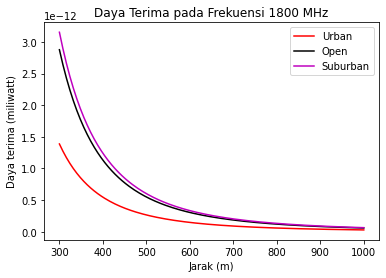

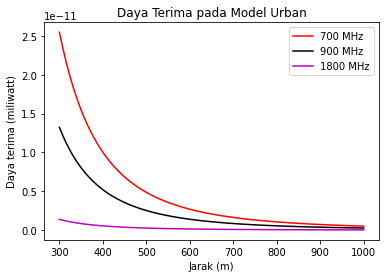

In [13]:
# GRAFIK DAYA TERIMA
def graphprx_1():
  plt.figure()
  plt.plot(d,dayaterima_Urban,'r', label='Urban')
  plt.plot(d,dayaterima_Open,'k', label='Open')
  plt.plot(d,dayaterima_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()
 
def graphprx_2():
  plt.figure()
  plt.plot(d,dayaterima_700,'r', label='700 MHz')
  plt.plot(d,dayaterima_900,'k', label='900 MHz')
  plt.plot(d,dayaterima_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()

graphprx_1()
graphprx_2()

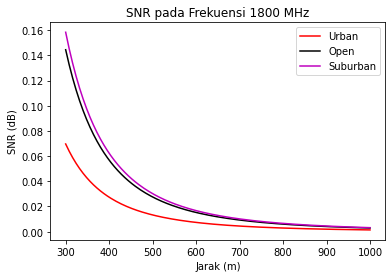

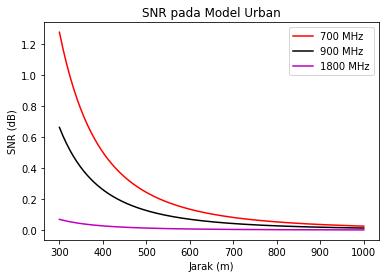

In [14]:
# GRAFIK SNR
def graph_snr1():
  plt.figure()
  plt.plot(d,SNR_Urban,'r', label='Urban')
  plt.plot(d,SNR_Open,'k', label='Open')
  plt.plot(d,SNR_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def graph_snr2():
  plt.figure()
  plt.plot(d,SNR_700,'r', label='700 MHz')
  plt.plot(d,SNR_900,'k', label='900 MHz')
  plt.plot(d,SNR_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

graph_snr1()
graph_snr2()

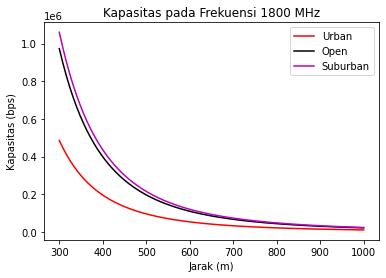

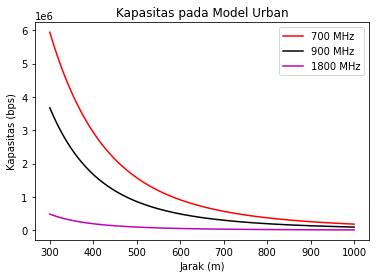

In [15]:
#GRAFIK KAPASITAS SELULER 
def graph_ke1():
  plt.figure()
  plt.plot(d,Ke_Urban,'r', label='Urban')
  plt.plot(d,Ke_Open,'k', label='Open')
  plt.plot(d,Ke_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def graph_ke2():
  plt.figure()
  plt.plot(d,Ke_700,'r', label='700 MHz')
  plt.plot(d,Ke_900,'k', label='900 MHz')
  plt.plot(d,Ke_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

graph_ke1()
graph_ke2()